In [26]:
##########################################################################################################################################################
## File:         AX18210_Homework5.ipynb
## Author:       Syed Husain
## Date:         5/20/2023
## E-mail:       ax18210@umbc.edu
## Desciption: The file reads from csv files and uses the data to program specific tasks
## Course/Section : CMSC 471
##############################################################################################################################################

#libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Files
car_file = "cars.csv"
cancer_file = "cancer.csv"
email_file = "emails.csv"

# Load the data
data = pd.read_csv(car_file)

# Get the features to scale
features = data.columns[1:]

# Calculate the mean and variance of each feature
means = data[features].mean()
variances = data[features].var()

# Scale each feature using mean normalization
scaled_data = (data[features] - means) / np.sqrt(variances)

#2A

# Print the first 5 values of each scaled feature
print(scaled_data.head())

# Print the mean and variance of each scaled feature
print("\nMean of scaled features:")
print(scaled_data.mean().apply(lambda x: "{:.2f}".format(x)).to_string())
print("\nVariance of scaled features:")
print(scaled_data.var().to_string())


        cyl      disp        hp      drat        wt      qsec        vs   
0 -0.104988 -0.570620 -0.535093  0.567514 -0.610400 -0.777165 -0.868028  \
1 -0.104988 -0.570620 -0.535093  0.567514 -0.349785 -0.463781 -0.868028   
2 -1.224858 -0.990182 -0.783040  0.474000 -0.917005  0.426007  1.116036   
3 -0.104988  0.220094 -0.535093 -0.966118 -0.002300  0.890487  1.116036   
4  1.014882  1.043081  0.412942 -0.835198  0.227654 -0.463781 -0.868028   

         am      gear      carb  
0  1.189901  0.423554  0.735203  
1  1.189901  0.423554  0.735203  
2  1.189901  0.423554 -1.122152  
3 -0.814143 -0.931819 -1.122152  
4 -0.814143 -0.931819 -0.503034  

Mean of scaled features:
cyl     -0.00
disp     0.00
hp       0.00
drat    -0.00
wt      -0.00
qsec    -0.00
vs       0.00
am       0.00
gear    -0.00
carb     0.00

Variance of scaled features:
cyl     1.0
disp    1.0
hp      1.0
drat    1.0
wt      1.0
qsec    1.0
vs      1.0
am      1.0
gear    1.0
carb    1.0


2B

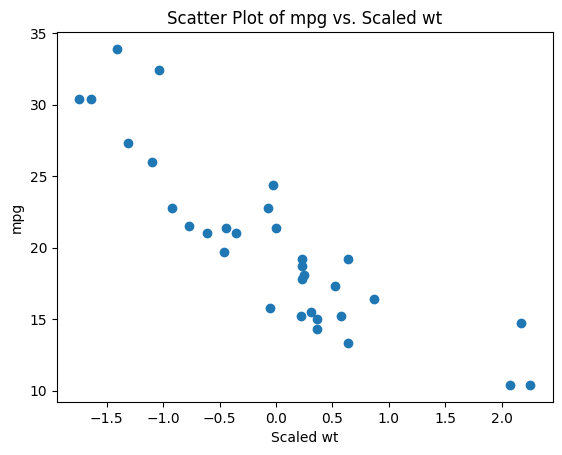

In [27]:
# Calculate scaled wt
scaled_wt = (data['wt'] - data['wt'].mean()) / np.sqrt(data['wt'].var())

# Create a scatter plot of mpg vs. scaled wt
plt.scatter(scaled_wt, data['mpg'])
plt.xlabel('Scaled wt')
plt.ylabel('mpg')
plt.title('Scatter Plot of mpg vs. Scaled wt')
plt.show()

From the graph we see an inverse realtionship between mpg and scaled wt, where the lower the value of Scaled wt is, the higher the value of mpg becomes. This indicates that the vehicles with lower weight tend to have higher miles per gallon (mpg) ratings, indicating better fuel efficiency. On the other hand, as the weight of the vehicle increases, the fuel efficiency decreases, resulting in lower mpg values.

2C

In [28]:
# Prepare the data
X = scaled_wt.values
y = data['mpg'].values

# Initialize parameters
theta0 = 0
theta1 = 0

# Set learning rate and convergence threshold
learning_rate = 0.2
convergence_threshold = 1e-5

# Perform gradient descent
m = len(X)

converged = False
while not converged:
    theta0_old = theta0
    theta1_old = theta1

    predictions = theta0 + theta1 * X
    
    # Update parameters
    theta0 -= learning_rate * (1 / m) * np.sum(predictions - y)
    theta1 -= learning_rate * (1 / m) * np.sum((predictions - y) * X)

    if abs(theta0 - theta0_old) < convergence_threshold and abs(theta1 - theta1_old) < convergence_threshold:
        converged = True

# Print the learned hypothesis
print('Learned Hypothesis:')
print('theta0:', theta0)
print('theta1:', theta1)

Learned Hypothesis:
theta0: 20.090586514008464
theta1: -5.229322134381895


2D

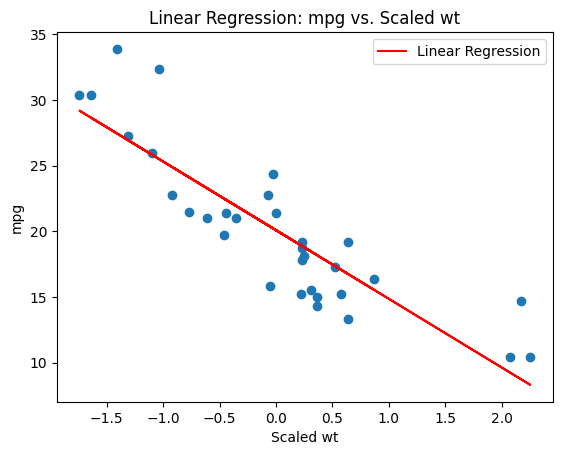

In [29]:
# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, theta0 + theta1 * X, color='red', label='Linear Regression')
plt.xlabel('Scaled wt')
plt.ylabel('mpg')
plt.title('Linear Regression: mpg vs. Scaled wt')
plt.legend()
plt.show()

From the linear hypothesis, we find that the linear regression is a negative slope as it finds the best-fitting line that represents the inverse relationship between variables scaled wt and mpg. Thus, the linear hypothesis supports the inverse relationship whereas the weight of the vehicle decreases, the fuel efficiency improves, resulting in higher mpg values.

2E

In [30]:
# List of features to be scaled
features = ['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

# Calculate scaled features
scaled_features = (data[features] - data[features].mean()) / np.sqrt(data[features].var())

# Prepare the data
X = np.column_stack((np.ones(len(data)), scaled_features.values))
y = data['mpg'].values

# Initialize parameters
theta = np.zeros(X.shape[1])

#set the learning rate and threshold
learning_rate = 0.2
convergence_threshold = 1e-5

# Perform gradient descent
m = len(X)

converged = False
while not converged:
    prev_theta = np.copy(theta)
    
    # Calculate predictions
    predictions = np.dot(X, theta)
    
    # Update parameters
    theta -= (learning_rate / m) * np.dot(X.T, predictions - y)

    # Check convergence
    if np.abs(theta - prev_theta).max() < convergence_threshold:
        converged = True

# Print the learned parameters
print('Learned Hypothesis:')
for i, feature in enumerate(['Intercept'] + features):
    #print(f'{feature}: {theta[i]}')
    print(f'theta{i}: {theta[i]}')

Learned Hypothesis:
theta0: 20.090624999999996
theta1: -0.19849676723406798
theta2: 1.6505937651443514
theta3: -1.4720983511411836
theta4: 0.4210233250566191
theta5: -3.6335879105034374
theta6: 1.46666525725918
theta7: 0.16014005297309947
theta8: 1.257569039501299
theta9: 0.48380029357102816
theta10: -0.3232335915484782


3A

In [31]:
# Load the dataset from cancer.csv
data = pd.read_csv(cancer_file)


# Extract the features and target variable
X = data['Smoking']
y = data['LungCancer']

# Initialize parameters
theta0 = 0
theta1 = 0

# Set learning rate and convergence threshold
learning_rate = 0.2
convergence_threshold = 1e-5

# Perform gradient descent
converged = False
while not converged:
    theta0_old = theta0
    theta1_old = theta1
    
    # Calculate hypothesis and update parameters
    h_theta = 1 / (1 + np.exp(-(theta0 + theta1 * X)))
    theta0 -= learning_rate * np.mean(h_theta - y)
    theta1 -= learning_rate * np.mean((h_theta - y) * X)
    
    # Check convergence
    if abs(theta0 - theta0_old) < convergence_threshold and abs(theta1 - theta1_old) < convergence_threshold:
        converged = True

# Print the learned probabilities
print("Learned Probabilities:")
print("theta0 =", theta0)
print("theta1 =", theta1)

Learned Probabilities:
theta0 = -0.22245294567679239
theta1 = 0.6275279092602254


3B

In [32]:
# Extract the features (Smoking) and labels (LungCancer)
smoking = data['Smoking']
lung_cancer = data['LungCancer']

# Function to calculate the predicted probability using the given hypothesis
def predict_probability(smoking, theta0, theta1):
    z = theta0 + theta1 * smoking
    return 1 / (1 + np.exp(-z))

# Classify individuals based on the learned parameters
predicted_probabilities = predict_probability(smoking, theta0, theta1)
predicted_labels = np.where(predicted_probabilities > 0.5, 1, 0)

# Calculate the confusion matrix
confusion_matrix = pd.crosstab(predicted_labels, lung_cancer, rownames=['Predicted'], colnames=['Actual'])

total_samples = len(lung_cancer)
correct_predictions = np.sum(lung_cancer == predicted_labels) 
accuracy = (correct_predictions / total_samples ) * 100

category_accuracy = np.diagonal(confusion_matrix) / np.sum(confusion_matrix, axis=1) 
category_accuracy = np.nan_to_num(category_accuracy, nan=0) * 100 # Replace NaN with 0 for categories with zero samples


def print_confusion_matrix(confusion_matrix, label_1, label_2, accuracy, category_accuracy):
    TN = confusion_matrix.iloc[0, 0]  # True Negative
    FP = confusion_matrix.iloc[1, 0]  # False Positive
    FN = confusion_matrix.iloc[0, 1]  # False Negative
    TP = confusion_matrix.iloc[1, 1]  # True Positive

    print('Confusion Matrix:')
    print(f"{'':23}Predicted")
    print(f"{'':23}{label_1:<10} {label_2}")
    print(f"Observed     {label_1:<12}{TP:<14}{FP}")
    print(f"             {label_2:<12}{FN:<14}{TN}")
    print('\nPercentages:')
    print("Overall Accuracy: {:.2f}%".format(accuracy))
    print(f'{label_1} Accuracy: {category_accuracy[1]:.2f}%')
    print(f'{label_2} Accuracy: {category_accuracy[0]:.2f}%')

label_1 = "Cancer"
label_2 = "No Cancer"
print_confusion_matrix(confusion_matrix, label_1, label_2, accuracy, category_accuracy)

Confusion Matrix:
                       Predicted
                       Cancer     No Cancer
Observed     Cancer      6             4
             No Cancer   4             5

Percentages:
Overall Accuracy: 57.89%
Cancer Accuracy: 60.00%
No Cancer Accuracy: 55.56%


From the results we find that the model correctly predicted 6 instances of cancer and correctly predicted 5 instances as not cancer. On the other hand, The model incorrectly predicted 4 instances as not cancer when they were actually cancer as well as incorrectly predicted 4 instances as cancer when they were actually not cancer. With an overall accuracy is 57.89%, model indicates a slightly better-than-random performance. On the other hand, the cancer accuracy and no cancer accuracy are 60.00% and 55.56% respectively which suggests that the model is better at predicting cancer cases than non-cancer cases. 

4A

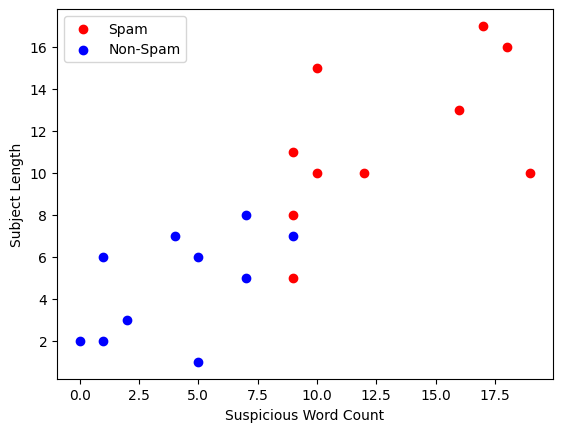

In [33]:
# Load the dataset
df = pd.read_csv(email_file)

# Create separate dataframes for spam and non-spam emails
spam_emails = df[df['SpamFlag'] == 1]
non_spam_emails = df[df['SpamFlag'] == 0]

# Create the scatter plot
plt.scatter(spam_emails['SuspiciousWordCount'], spam_emails['SubjectLength'], color='red', label='Spam')
plt.scatter(non_spam_emails['SuspiciousWordCount'], non_spam_emails['SubjectLength'], color='blue', label='Non-Spam')

# Label the axes and add a legend
plt.xlabel('Suspicious Word Count')
plt.ylabel('Subject Length')
plt.legend()

# Show the plot
plt.show()



From the plot we find that as the value of suspicious word count increases the value of subject length also increases. This indicates a positive correlation between the suspicious word count and subject length where on average, emails with more suspicious words tend to have longer subjects. For values of suspicious word count between 0-10 we find spam points which implies that emails with a low number of suspicious words (between 0-10) tend to be labeled as spam. It suggests that this range of suspicious word counts is associated with a higher likelihood of an email being classified as spam. On the other hand, emails with suspicious words (between 10-20) tend to be classified as non-spam. It implies that this range of suspicious word counts is associated with a higher likelihood of an email being classified as non-spam.

4B

In [34]:
df = pd.read_csv(email_file)

# Define the logistic regression hypothesis
def logistic_regression_hypothesis(theta, X):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

# Add a column of 1s to the dataframe for the bias term
df['Bias'] = 1

# Extract the features and labels
X = df[['Bias', 'SubjectLength', 'SuspiciousWordCount']].values
y = df['SpamFlag'].values


def gradient_descent(theta, learning_rate, convergence_threshold):
    # Perform gradient descent
    converged = False
    prev_theta = np.copy(theta)

    while not converged:
        gradient = np.dot(X.T, logistic_regression_hypothesis(theta, X) - y) / len(y)
        theta -= learning_rate * gradient

        # Check convergence
        if np.abs(theta - prev_theta).max() < convergence_threshold:
            return theta

        prev_theta = np.copy(theta)

    return theta

# Initialize the parameters
theta = np.zeros(3)  

#set the learning rate and threshold
learning_rate = 0.20
convergence_threshold = 1e-5

theta = gradient_descent(theta, learning_rate, convergence_threshold)

print('Learned Probabilities:')
for i, val in enumerate(theta):
    print(f"Theta{i} = {val}")

Learned Probabilities:
Theta0 = -35.68618636195089
Theta1 = 0.2354974355861845
Theta2 = 3.89216072579534


4D

In [35]:
# Define the logistic regression hypothesis
def logistic_regression_hypothesis(theta, X):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

# Calculate the probabilities for spam emails
prob_spam = logistic_regression_hypothesis(theta, X)

# Classify emails based on the probability threshold of 0.5
predicted_labels = np.where(prob_spam >= 0.5, 1, 0)

# Calculate the confusion matrix
confusion_matrix = pd.crosstab(y, predicted_labels, rownames=['Actual'], colnames=['Predicted'])

# Calculate overall accuracy
accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(np.sum(confusion_matrix)) * 100
category_accuracy = np.diagonal(confusion_matrix) / np.sum(confusion_matrix, axis=1) 
category_accuracy = np.nan_to_num(category_accuracy, nan=0) * 100 # Replace NaN with 0 for categories with zero samples

# Example usage
label_1 = "Spam"
label_2 = "Non-Spam"

print_confusion_matrix(confusion_matrix, label_1, label_2, accuracy, category_accuracy)



Confusion Matrix:
                       Predicted
                       Spam       Non-Spam
Observed     Spam        10            0
             Non-Spam    1             9

Percentages:
Overall Accuracy: 95.00%
Spam Accuracy: 100.00%
Non-Spam Accuracy: 90.00%


From the results we find that the model correctly predicted 10 instances as spam and correctly predicted 9 instances as non-spam. On the other hand, The model incorrectly predicted only a single 1 instance as spam when it was actually not spam. The model never incorrectly predicted any non-spam. The model achieved a good 95% of overall accuracy which demonstrates excellent performance. It achieved high accuracy scores across the board, correctly identifying all instances of spam and achieving a 90% accuracy for non-spam cases. 
Thus, the model exhibited excellent performance, with high accuracy, low false positive rate, and successful identification of both spam and non-spam instances.